## Data Prep:

1. Read in the data and apply your data prep function to it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [3]:
income = pd.read_csv("../Data/income.csv")

X_train, X_test, y_train, y_test = income_model_prep(income)

In [4]:
income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


## Assignment 1:

1. Scale your feature data frames
2. Fit a KNN model with k = 5, using the features `age` and `hoursperweek`
3. Print the model accuracy score and confusion matrix for both the training and test data
4. Using the test data, create a scatterplot with `age` in the x-axis, `hoursperweek` in the y-axis, and color each point with the predicted class.

In [6]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train[["age", "hoursperweek"]])
X_test_std = std.transform(X_test[["age", "hoursperweek"]])

In [7]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.8745211476819639
Test Accuracy: 0.8242651657285803


In [20]:
print(confusion_matrix(y_train, knn.predict(X_train_std)))
print(confusion_matrix(y_test, knn.predict(X_test_std)))

[[18161  1241]
 [ 1969  4211]]
[[4397  484]
 [ 640  875]]


<Axes: xlabel='age', ylabel='hoursperweek'>

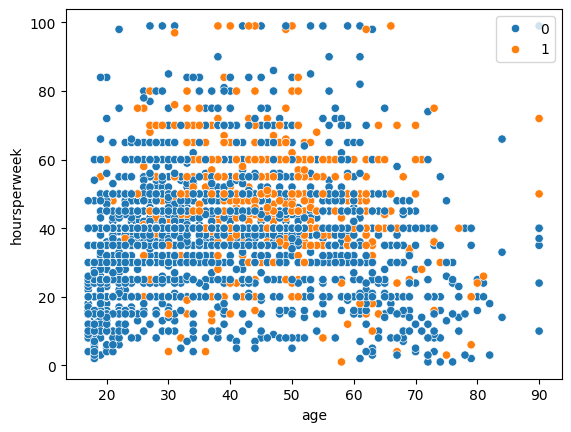

In [21]:
import seaborn as sns

sns.scatterplot(x=X_test["age"], y=X_test["hoursperweek"], hue=knn.predict(X_test_std))

In [22]:
!git add KNN_so.ipynb
!git commit -m "Assignment 1"
!git push origin master

[master 1f08b7f] Assignment 1
 1 file changed, 535 insertions(+), 37 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 22 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.16 KiB | 739.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:Proftg/Maven-Classification.git
   c239177..1f08b7f  master -> master


## Assignment 2: 

1. Fit a KNN with all features and k=5. Print train and test accuracy.
2. Use GridSearchCV to find the optimal value for k, then print test accuracy and the confusion matrix.

In [23]:
from sklearn.preprocessing import StandardScaler

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [25]:
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.8745211476819639
Test Accuracy: 0.8242651657285803


In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)

gridsearch.fit(X_train_std, y_train)
#Gridsearch
gridsearch.best_params_

{'n_neighbors': 13}

In [27]:
k = 25
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=25)

In [28]:
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.8413337502931749
Test Accuracy: 0.8291119449656035


In [29]:
print(confusion_matrix(y_test, knn.predict(X_test_std)))

[[4478  403]
 [ 690  825]]


In [34]:
!git add KNN_so.ipynb
!git commit -m "Assignment 2"
!git push origin master

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   EDA_ass.ipynb
	modified:   ../Slides and Demos/KNN.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.DS_Store
	.ipynb_checkpoints/
	01_EDA_assignments.ipynb:Zone.Identifier
	01_EDA_solutions.ipynb:Zone.Identifier
	02_KNN_assignments.ipynb
	02_KNN_assignments.ipynb:Zone.Identifier
	02_KNN_solutions.ipynb:Zone.Identifier
	03_logistic_regression_assignments.ipynb
	03_logistic_regression_assignments.ipynb:Zone.Identifier
	03_logistic_regression_solutions.ipynb
	03_logistic_regression_solutions.ipynb:Zone.Identifier
	04_metrics_assignments.ipynb
	04_metrics_assignments.ipynb:Zone.Identifier
	04_metrics_solutions.ipynb
	04_metrics_solutions.ipynb:Zone.Identifier
	05_Imbalanced_data_assignments.ipynb
	05_Imbala